In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset (replace 'toyota.csv' with your dataset file)
data = pd.read_csv("Toyota.csv")

In [4]:
# Drop any columns that are not relevant for classification
data.drop(columns=["Id", "Model"], inplace=True)

In [5]:
# Encode categorical variables (e.g., Fuel_Type)
categorical_columns = ["Fuel_Type"]
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [6]:
# Split data into features (X) and target variable (Price)
X = data.drop(columns=["Price"])
y = data["Price"]

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Create the k-NN classifier (you can specify the value of k)
knn = KNeighborsClassifier(n_neighbors=5)

In [10]:
# Train the classifier on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

In [12]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

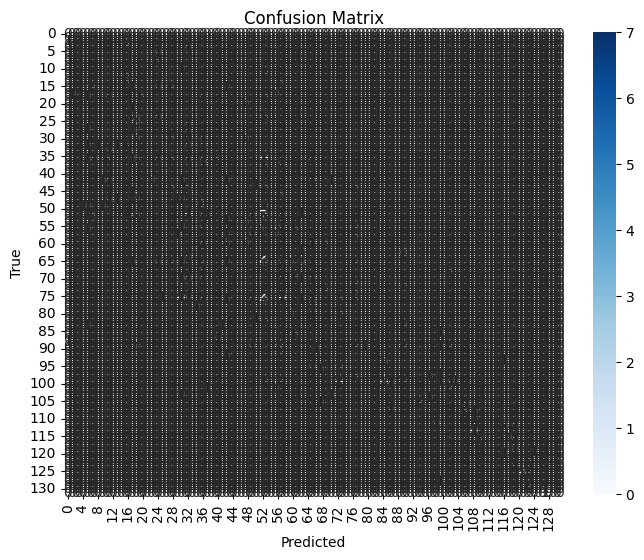

In [13]:
# Plot the confusion matrix (for a large number of unique Price values, this may not be practical)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, cmap="Blues", annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [16]:
# Calculate precision and recall with zero_division parameter
precision = precision_score(y_test, y_pred, average="weighted", zero_division=1)
recall = recall_score(y_test, y_pred, average="weighted", zero_division=1)

In [15]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.09027777777777778
Precision: 0.09219240122017898
Recall: 0.09027777777777778


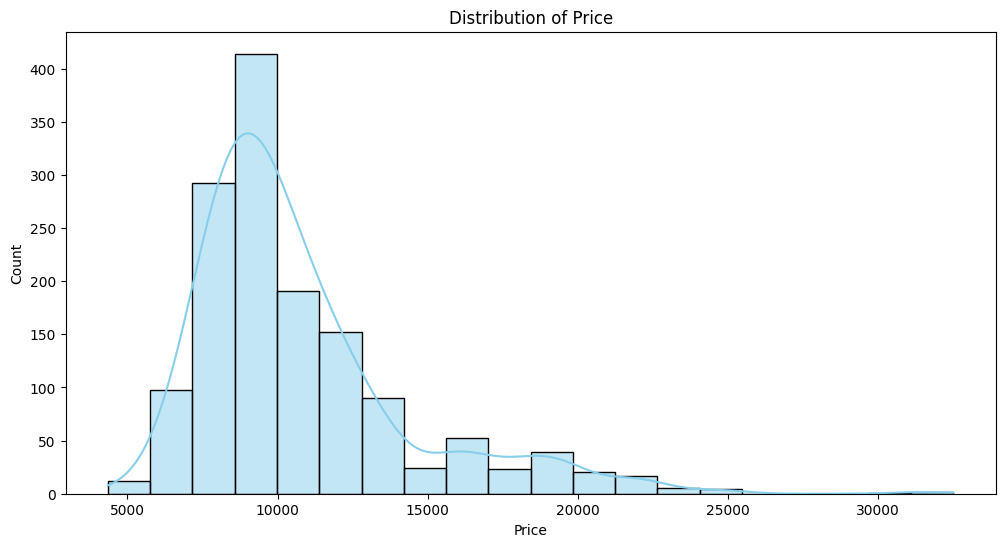

In [18]:
# Plot a bar graph for the distribution of Price (you can customize this based on your requirements)
plt.figure(figsize=(12, 6))
sns.histplot(data, x="Price", bins=20, kde=True, color="skyblue")
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Distribution of Price")
plt.show()